# Miscellaneous testing

## Dunno

In [1]:
import torch

In [2]:
predicted = torch.tensor(
    [[0.0819, 0.0494, 0.0697, 0.0646, 0.0677, 0.0576, 0.0603, 0.0496, 0.0712, 0.0793, 0.0688, 0.0827, 0.0722, 0.0583, 0.0667],
    [0.0819, 0.0494, 0.0697, 0.0646, 0.0677, 0.0576, 0.0603, 0.0496, 0.0712, 0.0793, 0.0688, 0.0827, 0.0722, 0.0583, 0.0667],
    [0.0819, 0.0494, 0.0697, 0.0646, 0.0677, 0.0576, 0.0603, 0.0496, 0.0712, 0.0793, 0.0688, 0.0827, 0.0722, 0.0583, 0.0667]]
)

In [6]:
predicted = torch.tensor(
    [[0.01, 0.05, 0.02, 0.02, 0.9],
    [0.03, 0.1,  0.42, 0.05, 0.4 ]]
)

In [3]:
actual = torch.tensor(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]
)

In [8]:
actual = torch.tensor(
    [4, 2]
)

In [10]:
from torch.nn.functional import cross_entropy

In [53]:
cross_entropy_custom = lambda p, q: - torch.sum(p * torch.log(q), axis=1)

In [34]:
actual[:1]

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
cross_entropy_custom(actual[2:3], predicted[2:3])

tensor([1.2197])

In [16]:
actual[:1]

tensor([4])

In [17]:
predicted[:1]

tensor([[0.0100, 0.0500, 0.0200, 0.0200, 0.9000]])

In [15]:
cross_entropy(predicted[:1], actual[:1])

tensor(0.9812)

In [2]:
from gymnasium.wrappers.flatten_observation import FlattenObservation
from footsies_gym.envs.footsies import FootsiesEnv
from footsies_gym.wrappers.normalization import FootsiesNormalized
from footsies_gym.wrappers.action_comb_disc import FootsiesActionCombinationsDiscretized

In [3]:
env = FootsiesActionCombinationsDiscretized(
    FlattenObservation(
        FootsiesNormalized(
            FootsiesEnv()
        )
    )
)

In [4]:
from main import import_agent, load_agent_model

In [6]:
agent = import_agent("mimic", env, {})

In [7]:
load_agent_model(agent, "mimic")

Agent loaded


In [8]:
from agents.mimic.agent import FootsiesAgent as MimicAgent

In [9]:
agent: MimicAgent

In [13]:
agent.p1_model.network.layers

Sequential(
  (0): Linear(in_features=36, out_features=32, bias=True)
  (1): Linear(in_features=32, out_features=15, bias=True)
  (2): InputClip()
  (3): DebugStoreRecent()
  (4): Sigmoid()
  (5): DebugStoreRecent()
)

In [14]:
import torch
from torch import nn

In [17]:
class SimpleNN(nn.Module):
    def __init__(self, i, o):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(i, 4),
            nn.Linear(4, o),
        )
    
    def forward(self, x):
        return self.layers(x)

In [18]:
n = SimpleNN(8, 8)

In [25]:
n.requires_grad_(False)

SimpleNN(
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=4, bias=True)
    (1): Linear(in_features=4, out_features=8, bias=True)
  )
)

In [23]:
x = torch.rand((1, 8))

In [26]:
n(x)

tensor([[-0.0357,  0.2117,  0.2518, -0.2706,  0.3531, -0.1332,  0.1393, -0.2218]])

In [27]:
n(n(x))

tensor([[ 0.0164,  0.2976,  0.3487, -0.2301,  0.2922, -0.1116,  0.3216, -0.2168]])

In [32]:
n.layers[0].weight.shape

torch.Size([4, 8])

In [51]:
w0 = n.layers[0].weight
w1 = n.layers[1].weight
b0 = n.layers[0].bias.unsqueeze(dim=1)
b1 = n.layers[1].bias.unsqueeze(dim=1)

In [53]:
w1 @ (w0 @ x.T + b0) + b1

tensor([[-0.0357],
        [ 0.2117],
        [ 0.2518],
        [-0.2706],
        [ 0.3531],
        [-0.1332],
        [ 0.1393],
        [-0.2218]])

In [55]:
w1 @ w0 @ x.T + w1 @ b0 + b1

tensor([[-0.0357],
        [ 0.2117],
        [ 0.2518],
        [-0.2706],
        [ 0.3531],
        [-0.1332],
        [ 0.1393],
        [-0.2218]])

## Game model

In [90]:
from agents.game_model.agent import FootsiesAgent as GameModelAgent

agent = GameModelAgent(
    observation_space_size=36,
    action_space_size=9,
    by_primitive_actions=False,
    by_observation_differences=True,
    move_transition_scale=1,
    mini_batch_size=1,
    learning_rate=0.01,
    hidden_layer_sizes_specification="128",
    hidden_layer_activation_specification="ReLU",
)

In [91]:
from main import load_agent_model

load_agent_model(agent, "game_model_one_layer_2")

Agent loaded


In [112]:
weight0 = list(agent.game_model.layers[0].parameters())[0].detach()

In [108]:
import matplotlib.pyplot as plt

In [128]:
torch.histogram(weight0, bins=10).hist

tensor([3.0000e+00, 1.6000e+01, 2.9800e+02, 6.4370e+03, 1.4000e+02, 1.1000e+01,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00])

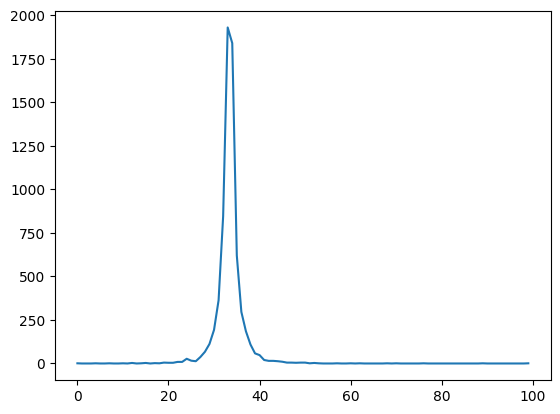

In [130]:
plt.plot(torch.histogram(weight0, bins=100).hist)

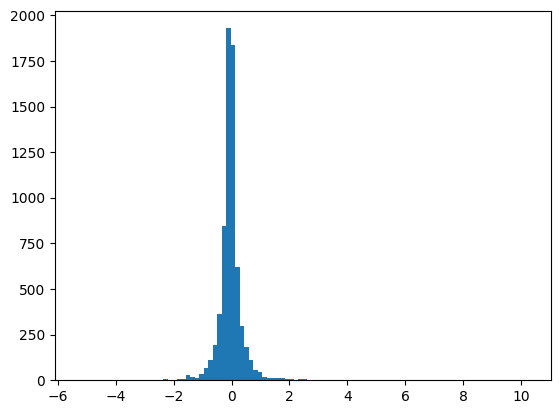

In [123]:
_, _, bar_container = plt.hist(weight0.flatten(), bins=100)

In [124]:
bar_container.patches[0].set_height(1500)

## Tile coding

In [89]:
import torch
import numpy as np
from dataclasses import dataclass
from enum import Enum
from functools import reduce


class Attribute(Enum):
    GUARD_P1 = lambda o: o["guard"][0]
    GUARD_P2 = lambda o: o["guard"][1]
    MOVE_P1 = lambda o: o["move"][0]
    MOVE_P2 = lambda o: o["move"][1]
    MOVE_PROGRESS_P1 = lambda o: o["move_frame"][0]
    MOVE_PROGRESS_P2 = lambda o: o["move_frame"][1]
    POSITION_P1 = lambda o: o["position"][0]
    POSITION_P2 = lambda o: o["position"][1]


@dataclass
class Tiling:
    breakpoints:    dict[Attribute, np.ndarray[float]]

    @property
    def attributes(self) -> list[Attribute]:
        return list(self.breakpoints)

    @property
    def dimensionality(self) -> int:
        return len(self.breakpoints)

    @property
    def tiles(self) -> int:
        return reduce(int.__mul__, map(self.tiles_of_attribute, self.breakpoints))

    def tiles_of_attribute(self, attribute: Attribute) -> int:
        return len(self.breakpoints[attribute]) + 1


class TileCoding:
    def __init__(
        self,
        tilings: list[Tiling],
    ):
        self.tilings = tilings

    
    def craft_tiling(self, observation: np.ndarray | torch.Tensor, tiling: Tiling) -> torch.Tensor:
        res = torch.zeros((1, tiling.tiles), dtype=torch.bool)
        
        presence = 0
        offset = 1

        for attribute, breakpoints in tiling.breakpoints.items():
            presence += offset * np.sum(breakpoints <= observation[:, attribute.value])
            offset *= tiling.tiles_of_attribute(attribute)
        
        res[0, presence] = True

        return res


    def transform(self, observation: np.ndarray | torch.Tensor) -> torch.Tensor:
        return torch.hstack([
            self.craft_tiling(observation, tiling)
            for tiling in self.tilings
        ])


In [78]:
coding = TileCoding(
    tilings=[
        Tiling({
            Attribute.GUARD_P1: np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]),
        }),
        Tiling({
            Attribute.GUARD_P1: np.array([0.0, 0.5, 1.0]),
            Attribute.GUARD_P2: np.array([0.0, 0.5, 1.0]),
        }),
    ]
)

In [79]:
observation = np.array([[
    0.6, 0.3
]])
observation

array([[0.6, 0.3]])

In [88]:
coding.craft_tiling(np.array([[
    1.0, 1.0
]]), coding.tilings[1])

3
4
15
16


tensor([[False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True]])

## Heatmap

In [4]:
import torch
import numpy as np
from plot_utils import Heatmap
from agents.a2c.a2c import CriticNetwork

In [2]:
critic = CriticNetwork(2)

In [6]:
grid = torch.meshgrid(
    torch.linspace(-1.2, 0.6, 20),
    torch.linspace(-0.07, 0.07, 20),
    indexing="xy",
)

In [7]:
states = torch.stack(grid, dim=-1)

In [13]:
for i in range(20):
    for j in range(20):
        assert critic(states)[3, 4, 0] == critic(states[3, 4, :].squeeze())

In [5]:
critic(torch.rand((1, 2)))

tensor([[-0.1800]], grad_fn=<AddmmBackward0>)

In [3]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = a[::-1, :]

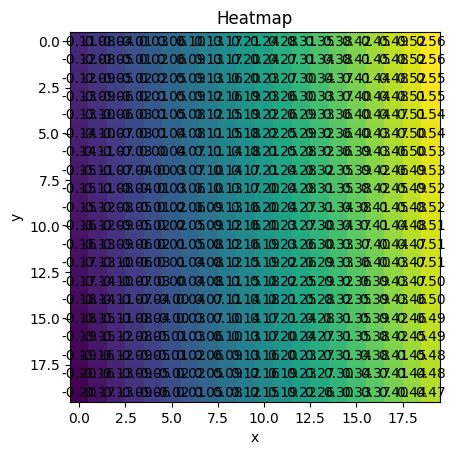

In [15]:
h = Heatmap(critic(states).detach().numpy().squeeze())

In [5]:
h.plot()

In [4]:
h.update(b)